In [2]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

For this project, I will be using the fastf1 library, which is built on top of Pandas DataFrames and Series but includes convenient methods for working specifically with Formula 1 data. The goal of this project is to analyze the race session of the 2024 Australian Grand Prix, where Ferrari achieved a 1-2 finish with Carlos Sainz as the winner (proud moment for a Ferrari fan!).

The first step is to load the data for this session. After loading the data, we will proceed with data cleaning. This involves removing laps affected by pit stops and laps that are not accurate due to yellow flags, virtual safety cars, safety cars, or red flags.


In [3]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme = 'fastf1')


# load a session and its telemetry data
session_23 = fastf1.get_session(2023, 'Austin Grand Prix', 'Q')
session_23.load()
# In this way i Can exclude the box laps
laps_23 = session_23.laps

# Pick just the accurate laps

circuit_info_23 = session_23.get_circuit_info()
pos = laps_23.pick_fastest().get_pos_data()




req         WARNING 	DEFAULT CACHE ENABLED! (1.2 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '4', '44', '55', '63', '1', '10', '31', '11', '81', '22', '24', '77', '20', '3', '27', '14', '23', '18', '2']


In [4]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme = 'fastf1')


# load a session and its telemetry data
session_24 = fastf1.get_session(2024, 'Austin Grand Prix', 'Q')
session_24.load()
# In this way i Can exclude the box laps
laps_24 = session_24.laps

# Pick just the accurate laps

circuit_info_24 = session_24.get_circuit_info()
pos = laps_24.pick_fastest().get_pos_data()

core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '55', '16', '81', '63', '10', '14', '20', '11', '22', '27', '31', '18', '30', '23', '43', '77', '44', '24']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core       

In [5]:
drivers_23 =laps_23['Driver'].unique()
compounds_23 = laps_23['Compound'].unique()


In [6]:
drivers_24 =laps_24['Driver'].unique()
compounds_24 = laps_24['Compound'].unique()

In [7]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [8]:
# Transform the laps in total seconds
transformed_laps_23 = laps_23.copy()
transformed_laps_23.loc[:, "LapTime (s)"] = laps_23["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order_23 = (
    transformed_laps_23[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette_23 = {team: get_team_color(team) for team in team_order_23}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [9]:
# Transform the laps in total seconds
transformed_laps_24 = laps_24.copy()
transformed_laps_24.loc[:, "LapTime (s)"] = laps_24["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order_24 = (
    transformed_laps_24[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palett_24 = {team: get_team_color(team) for team in team_order_24}

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.


In [10]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

In [11]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

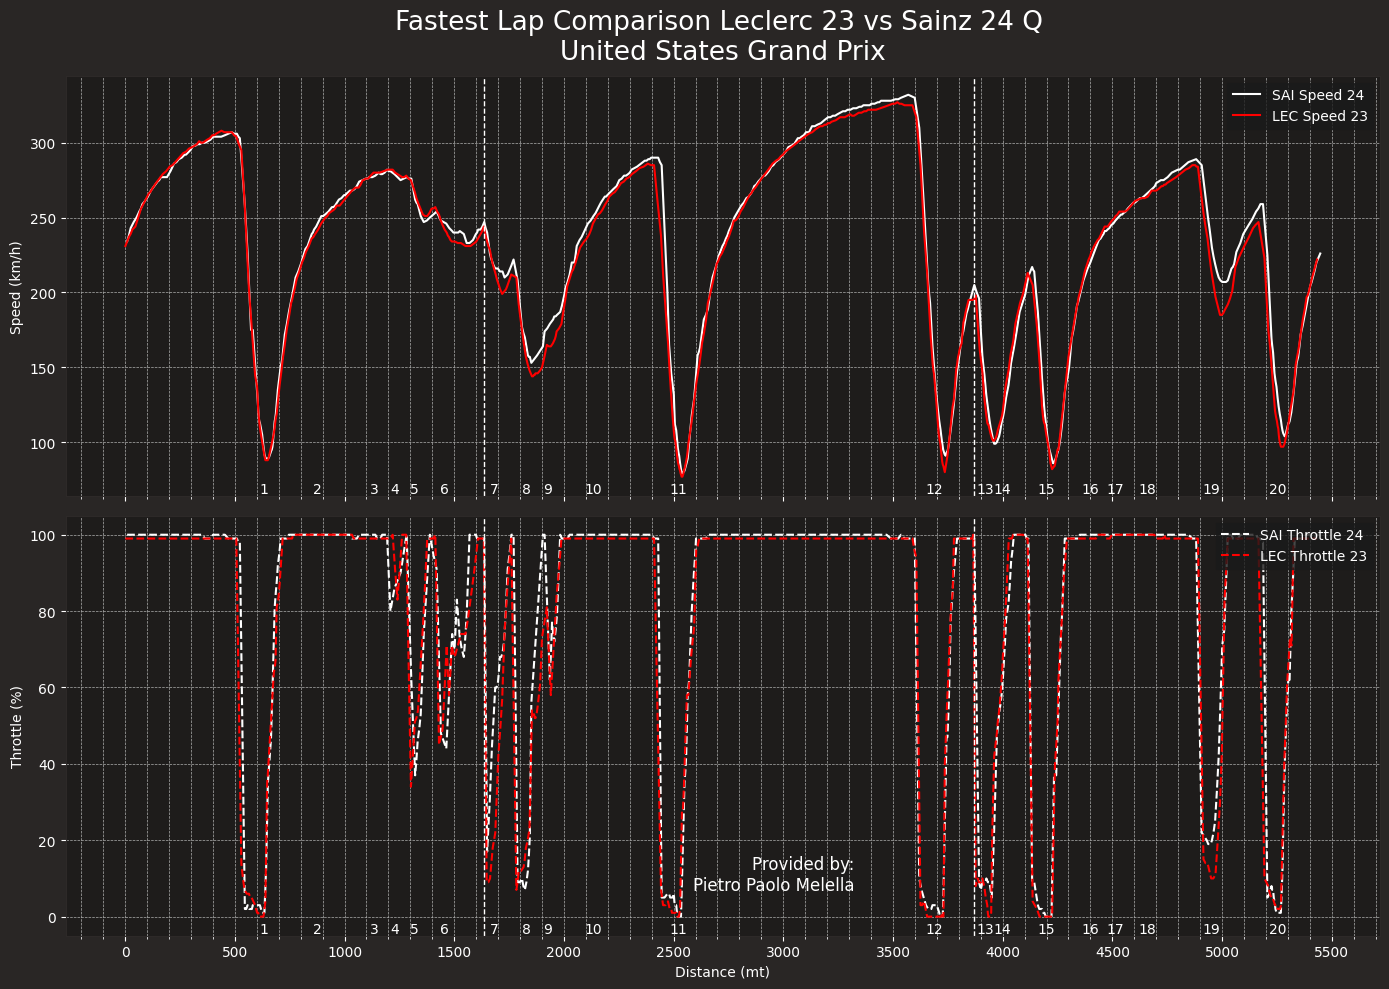

In [12]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP_23 = transformed_laps_23.pick_drivers('LEC').pick_fastest()
SAI_FASTEST_LAP_24 = transformed_laps_24.pick_drivers('LEC').pick_fastest()

# Get telemetry data and add distance
LEC_tel_23 = LEC_FASTEST_LAP_23.get_car_data().add_distance()
SAI_tel_24 = SAI_FASTEST_LAP_24.get_car_data().add_distance()


# Interpolating the data
LEC_tel_23 = interpolate_dataframe(LEC_tel_23)
SAI_tel_24 = interpolate_dataframe(SAI_tel_24)

# Length of the track
length_circuit = LEC_tel_23['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP_23['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP_23['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP_23['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel_23[LEC_tel_23['Time'] <= LEC_FASTEST_LAP_23['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel_23[LEC_tel_23['Time'] <= (LEC_FASTEST_LAP_23['Sector1Time'] + LEC_FASTEST_LAP_23['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info_24.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(SAI_tel_24['Distance'], SAI_tel_24['Speed'], color='white', label='SAI Speed 24')
ax1.plot(LEC_tel_23['Distance'], LEC_tel_23['Speed'], color='red', label='LEC Speed 23')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison Leclerc 23 vs Sainz 24 Q \n{session_24.event['EventName']}", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(SAI_tel_24['Distance'], SAI_tel_24['Throttle'], color='white', linestyle='--', label='SAI Throttle 24')
ax2.plot(LEC_tel_23['Distance'], LEC_tel_23['Throttle'], color='red', linestyle='--', label='LEC Throttle 23')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Add a signature in the lower-right corner with a newline
plt.text(
    0.60, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Adjust layout
plt.tight_layout()
plt.show()


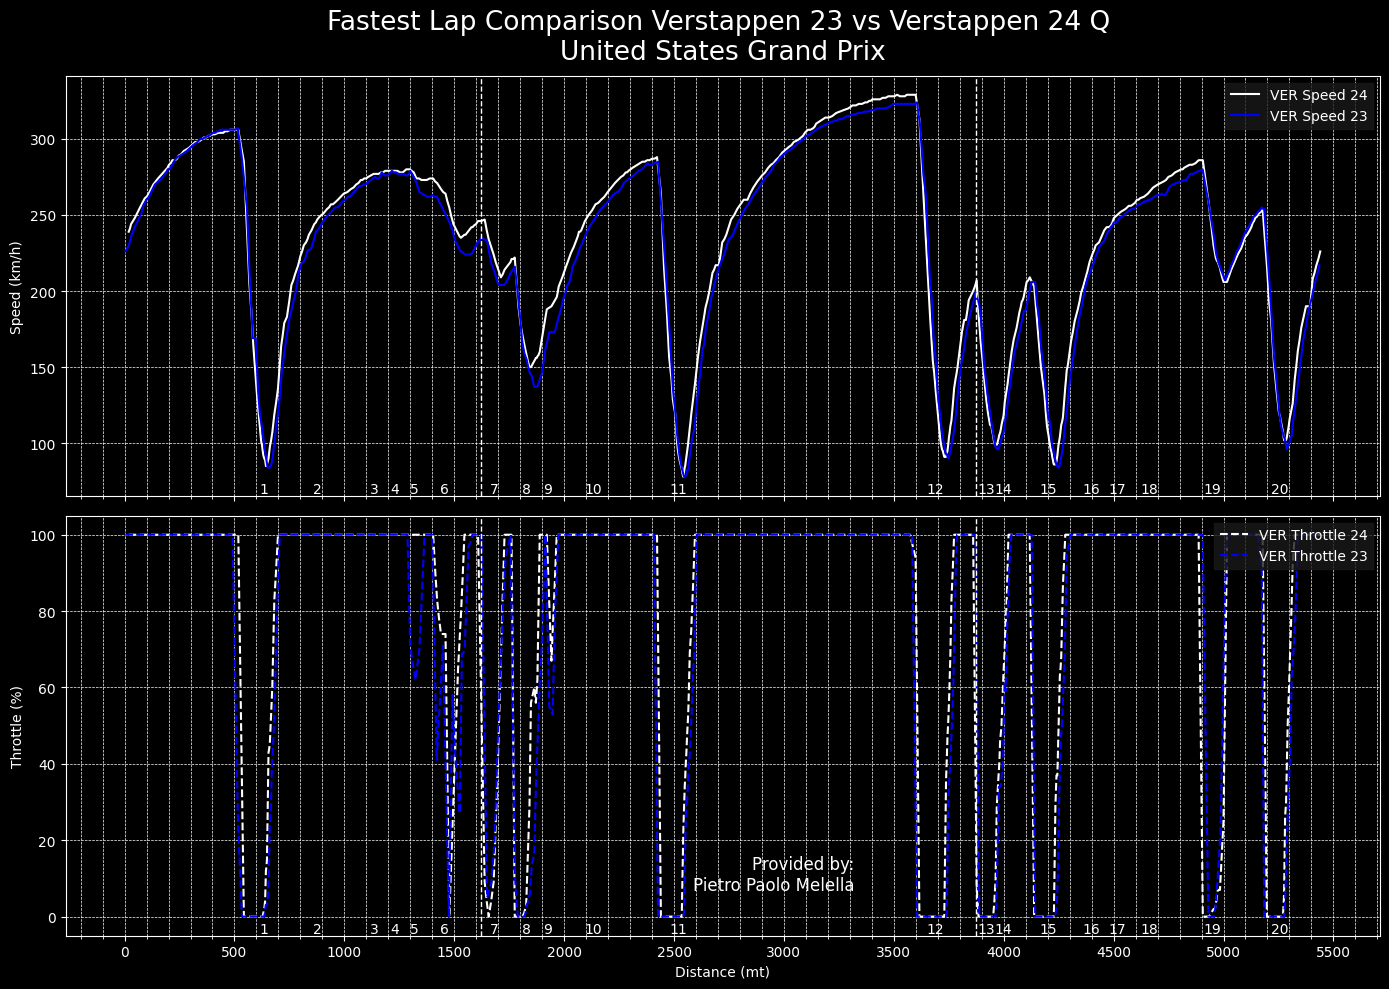

In [13]:
# Extract fastest laps for LEC and SAI
VER_FASTEST_LAP_23 = transformed_laps_23.pick_drivers('VER').pick_fastest()
VER_FASTEST_LAP_24 = transformed_laps_24.pick_drivers('VER').pick_fastest()

# Get telemetry data and add distance
VER_tel_23 = VER_FASTEST_LAP_23.get_car_data().add_distance()
VER_tel_24 = VER_FASTEST_LAP_24.get_car_data().add_distance()

# Interpolating the data
VER_tel_23 = interpolate_dataframe(VER_tel_23)
VER_tel_24 = interpolate_dataframe(VER_tel_24)

# Length of the track
length_circuit = VER_tel_23['Distance'].max()

# Get sector times for the fastest lap
VER_sector_times = [
    timedelta_to_seconds(VER_FASTEST_LAP_23['Sector1Time']),
    timedelta_to_seconds(VER_FASTEST_LAP_23['Sector2Time']),
    timedelta_to_seconds(VER_FASTEST_LAP_23['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(VER_sector_times)

# Calculate sector end distances
sector1_end_distance = VER_tel_23[VER_tel_23['Time'] <= VER_FASTEST_LAP_23['Sector1Time']]['Distance'].max()
sector2_end_distance = VER_tel_23[VER_tel_23['Time'] <= (VER_FASTEST_LAP_23['Sector1Time'] + VER_FASTEST_LAP_23['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info_24.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(VER_tel_24['Distance'], VER_tel_24['Speed'], color='white', label='VER Speed 24')
ax1.plot(VER_tel_23['Distance'], VER_tel_23['Speed'], color='blue', label='VER Speed 23')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison Verstappen 23 vs Verstappen 24 Q \n{session_24.event['EventName']}", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(VER_tel_24['Distance'], VER_tel_24['Throttle'], color='white', linestyle='--', label='VER Throttle 24')
ax2.plot(VER_tel_23['Distance'], VER_tel_23['Throttle'], color='blue', linestyle='--', label='VER Throttle 23')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Add a signature in the lower-right corner with a newline
plt.text(
    0.60, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Adjust layout
plt.tight_layout()
plt.show()

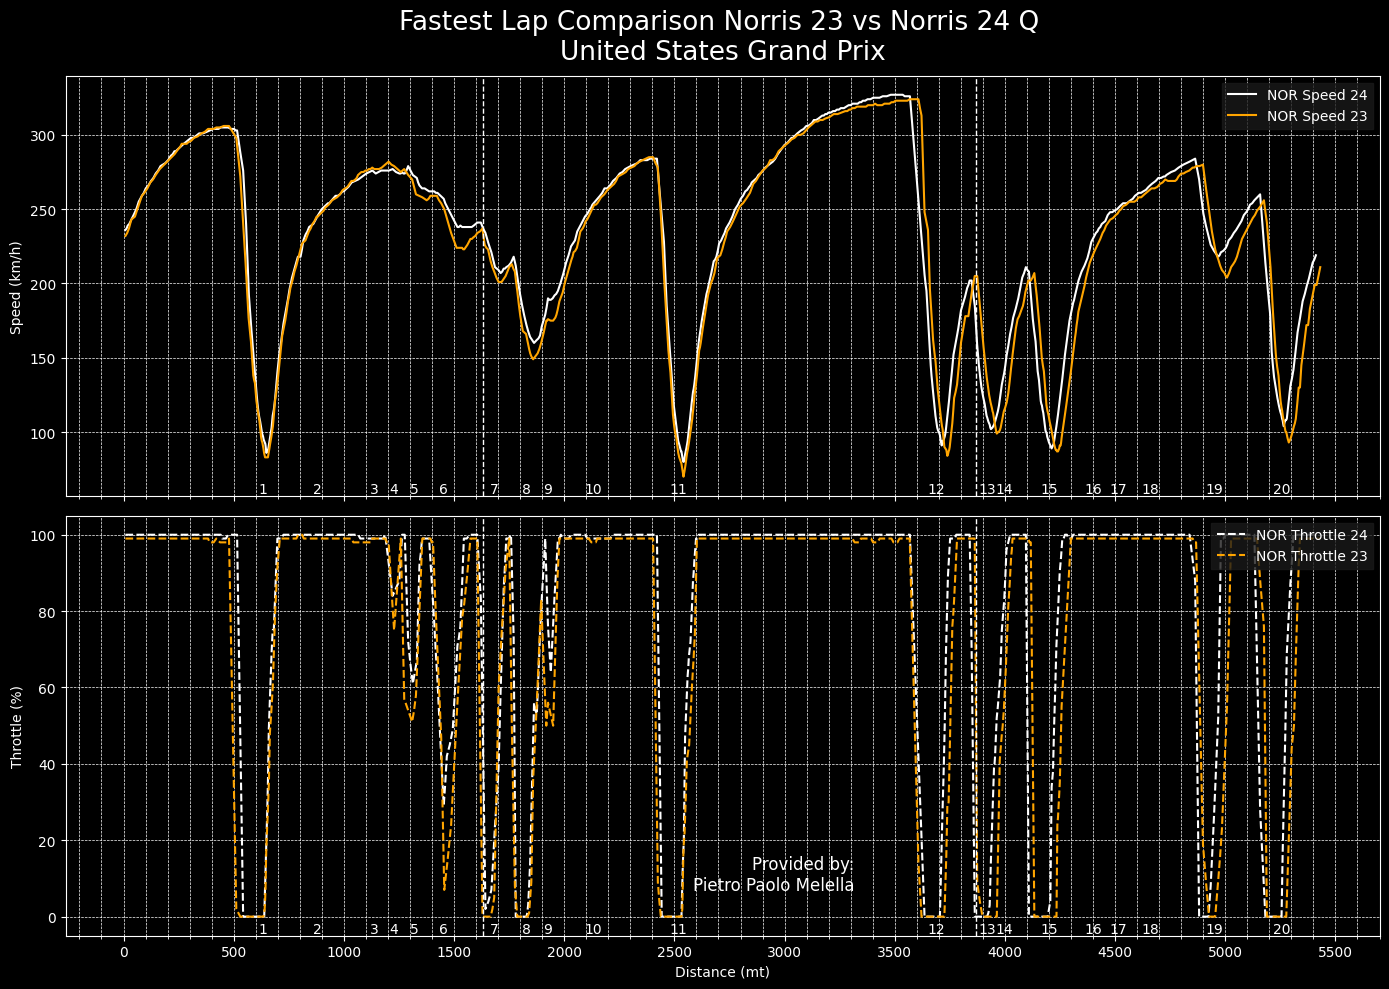

In [16]:
# Extract fastest laps for LEC and SAI
NOR_FASTEST_LAP_23 = transformed_laps_23.pick_drivers('NOR').pick_fastest()
NOR_FASTEST_LAP_24 = transformed_laps_24.pick_drivers('NOR').pick_fastest()

# Get telemetry data and add distance
NOR_tel_23 = NOR_FASTEST_LAP_23.get_car_data().add_distance()
NOR_tel_24 = NOR_FASTEST_LAP_24.get_car_data().add_distance()

# Interpolating the data
NOR_tel_23 = interpolate_dataframe(NOR_tel_23)
NOR_tel_24 = interpolate_dataframe(NOR_tel_24)

# Length of the track
length_circuit = NOR_tel_23['Distance'].max()

# Get sector times for the fastest lap
NOR_sector_times = [
    timedelta_to_seconds(NOR_FASTEST_LAP_23['Sector1Time']),
    timedelta_to_seconds(NOR_FASTEST_LAP_23['Sector2Time']),
    timedelta_to_seconds(NOR_FASTEST_LAP_23['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(NOR_sector_times)

# Calculate sector end distances
sector1_end_distance = NOR_tel_23[NOR_tel_23['Time'] <= NOR_FASTEST_LAP_23['Sector1Time']]['Distance'].max()
sector2_end_distance = NOR_tel_23[NOR_tel_23['Time'] <= (NOR_FASTEST_LAP_23['Sector1Time'] + NOR_FASTEST_LAP_23['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info_24.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(NOR_tel_24['Distance'], NOR_tel_24['Speed'], color='white', label='NOR Speed 24')
ax1.plot(NOR_tel_23['Distance'], NOR_tel_23['Speed'], color='orange', label='NOR Speed 23')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison Norris 23 vs Norris 24 Q \n{session_24.event['EventName']}", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(NOR_tel_24['Distance'], NOR_tel_24['Throttle'], color='white', linestyle='--', label='NOR Throttle 24')
ax2.plot(NOR_tel_23['Distance'], NOR_tel_23['Throttle'], color='orange', linestyle='--', label='NOR Throttle 23')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Add a signature in the lower-right corner with a newline
plt.text(
    0.60, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Adjust layout
plt.tight_layout()
plt.show()

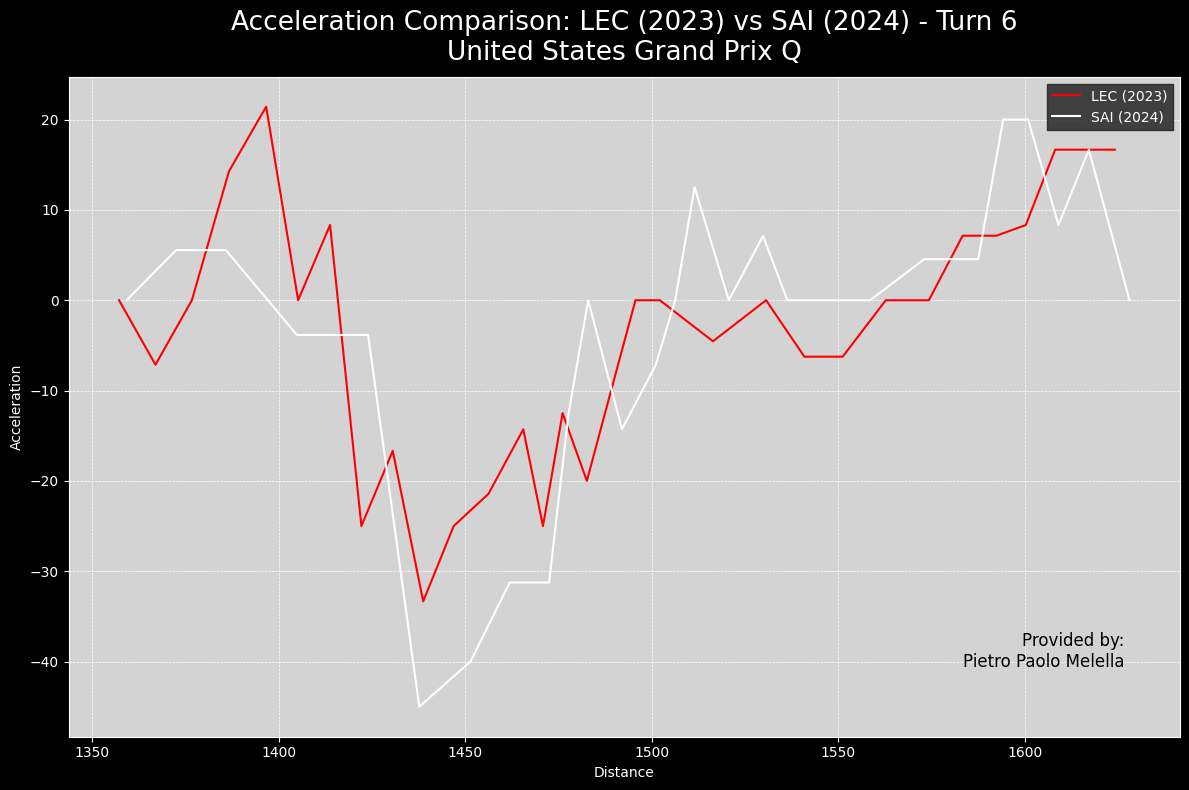

In [17]:
# Define the two drivers and their corresponding datasets
driver_23 = 'LEC'
driver_24 = 'SAI'

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# --- Process LEC (2023) data ---
# Pick the fastest lap for LEC in 2023
fastest_lap_23 = transformed_laps_23.pick_drivers(driver_23).pick_fastest()

# Get car data and add distance
car_data_23 = fastest_lap_23.get_car_data().add_distance()
# Interpolating
car_data_23 = interpolate_dataframe(car_data_23)

# Selecting the data starting from turn 6 for LEC (2023)
car_data_turn_6_23 = car_data_23[
    (car_data_23['Distance'] > (corner_distances[4] + 35)) & 
    (car_data_23['Distance'] < sector1_end_distance)
].copy()

# Calculate acceleration for LEC (2023)
car_data_turn_6_23['Acceleration'] = (
    car_data_turn_6_23['Speed'].diff().fillna(0) /
    car_data_turn_6_23['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for LEC (2023)
car_data_turn_6_23_throttle_99 = car_data_turn_6_23[car_data_turn_6_23['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for LEC (2023)
plt.plot(car_data_turn_6_23_throttle_99['Distance'], 
         car_data_turn_6_23_throttle_99['Acceleration'], 
         color='red', label=f"{driver_23} (2023)")

# --- Process SAI (2024) data ---
# Pick the fastest lap for SAI in 2024
fastest_lap_24 = transformed_laps_24.pick_drivers(driver_24).pick_fastest()

# Get car data and add distance
car_data_24 = fastest_lap_24.get_car_data().add_distance()

# Interpolating
car_data_24 = interpolate_dataframe(car_data_24)

# Selecting the data starting from turn 6 for SAI (2024)
car_data_turn_6_24 = car_data_24[
    (car_data_24['Distance'] > (corner_distances[4] + 35)) & 
    (car_data_24['Distance'] < sector1_end_distance)
].copy()

# Calculate acceleration for SAI (2024)
car_data_turn_6_24['Acceleration'] = (
    car_data_turn_6_24['Speed'].diff().fillna(0) /
    car_data_turn_6_24['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for SAI (2024)
car_data_turn_6_24_throttle_99 = car_data_turn_6_24[car_data_turn_6_24['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for SAI (2024)
plt.plot(car_data_turn_6_24_throttle_99['Distance'], 
         car_data_turn_6_24_throttle_99['Acceleration'], 
         color='white', label=f"{driver_24} (2024)")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title(f"Acceleration Comparison: {driver_23} (2023) vs {driver_24} (2024) - Turn 6\n{session_24.event['EventName']} Q", color='white')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

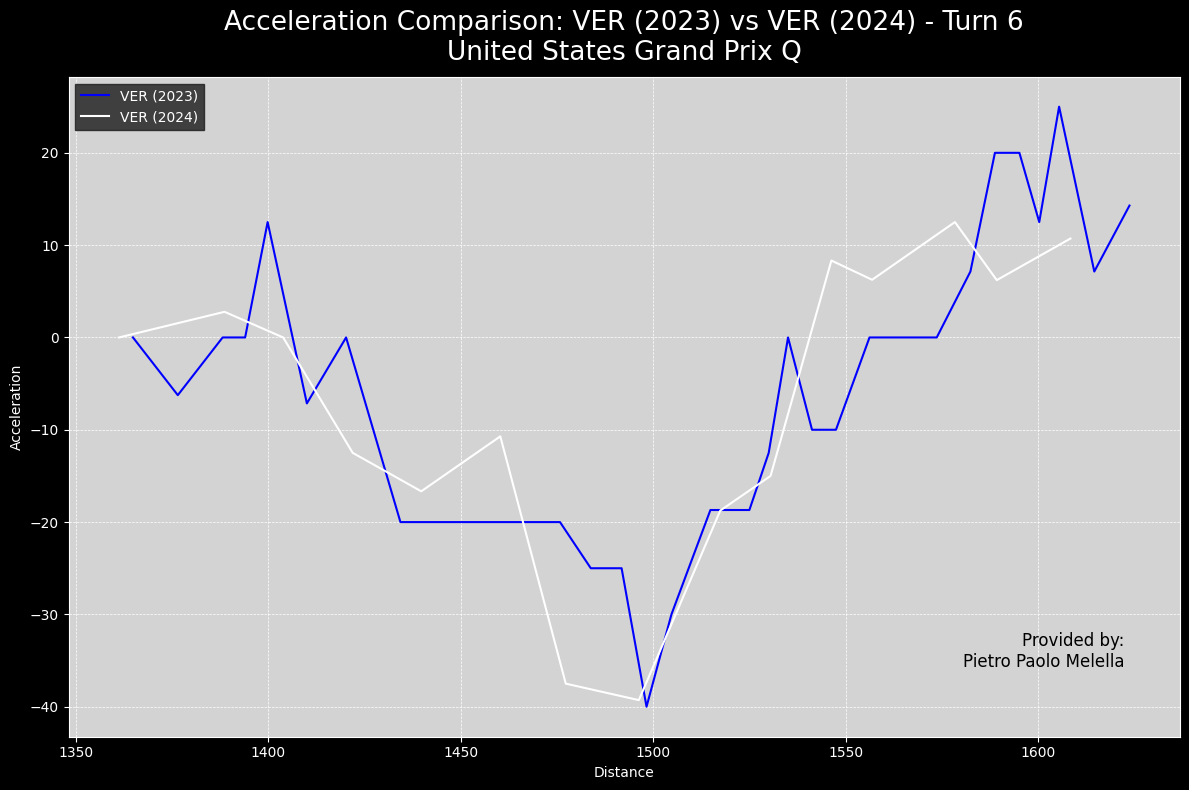

In [18]:
# Define the driver and corresponding datasets for 2023 and 2024
driver = 'VER'

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# --- Process VER (2023) data ---
# Pick the fastest lap for VER in 2023
fastest_lap_23 = transformed_laps_23.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_23 = fastest_lap_23.get_car_data().add_distance()

# Interpolating
car_data_23 = interpolate_dataframe(car_data_23)

# Selecting the data starting from turn 6 for VER (2023)
car_data_turn_6_23 = car_data_23[
    (car_data_23['Distance'] > (corner_distances[4] + 35)) & 
    (car_data_23['Distance'] < sector1_end_distance)
].copy()

# Calculate acceleration for VER (2023)
car_data_turn_6_23['Acceleration'] = (
    car_data_turn_6_23['Speed'].diff().fillna(0) /
    car_data_turn_6_23['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for VER (2023)
car_data_turn_6_23_throttle_99 = car_data_turn_6_23[car_data_turn_6_23['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for VER (2023)
plt.plot(car_data_turn_6_23_throttle_99['Distance'], 
         car_data_turn_6_23_throttle_99['Acceleration'], 
         color='blue', label=f"{driver} (2023)")

# --- Process VER (2024) data ---
# Pick the fastest lap for VER in 2024
fastest_lap_24 = transformed_laps_24.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_24 = fastest_lap_24.get_car_data().add_distance()

# Selecting the data starting from turn 6 for VER (2024)
car_data_turn_6_24 = car_data_24[
    (car_data_24['Distance'] > (corner_distances[4] + 35)) & 
    (car_data_24['Distance'] < sector1_end_distance)
].copy()

# Calculate acceleration for VER (2024)
car_data_turn_6_24['Acceleration'] = (
    car_data_turn_6_24['Speed'].diff().fillna(0) /
    car_data_turn_6_24['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for VER (2024)
car_data_turn_6_24_throttle_99 = car_data_turn_6_24[car_data_turn_6_24['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for VER (2024)
plt.plot(car_data_turn_6_24_throttle_99['Distance'], 
         car_data_turn_6_24_throttle_99['Acceleration'], 
         color='white', label=f"{driver} (2024)")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title(f"Acceleration Comparison: {driver} (2023) vs {driver} (2024) - Turn 6\n{session_24.event['EventName']} Q", color='white')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

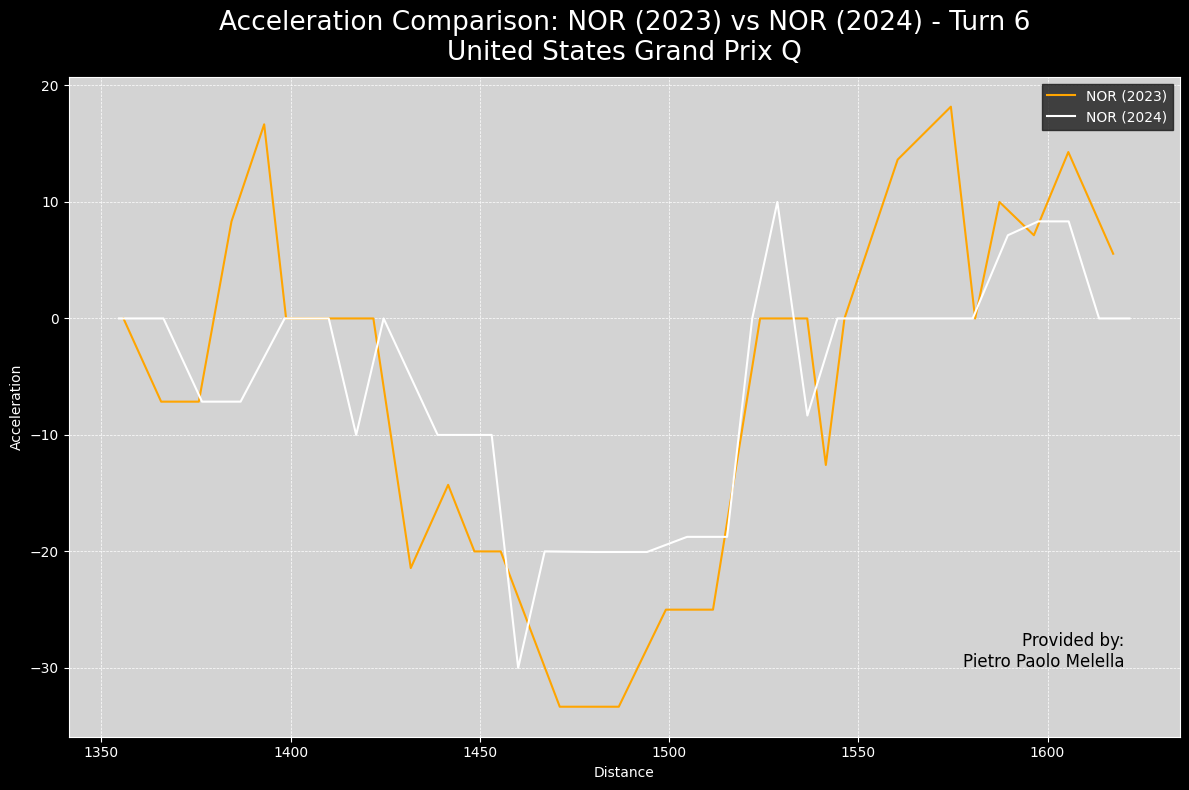

In [20]:
# Define the driver and corresponding datasets for 2023 and 2024
driver = 'NOR'

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# --- Process NOR (2023) data ---
# Pick the fastest lap for NOR in 2023
fastest_lap_23 = transformed_laps_23.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_23 = fastest_lap_23.get_car_data().add_distance()

# Interpolating
car_data_23 = interpolate_dataframe(car_data_23)

# Selecting the data starting from turn 6 for NOR (2023)
car_data_turn_6_23 = car_data_23[
    (car_data_23['Distance'] > (corner_distances[4] + 35)) & 
    (car_data_23['Distance'] < sector1_end_distance)
].copy()

# Calculate acceleration for NOR (2023)
car_data_turn_6_23['Acceleration'] = (
    car_data_turn_6_23['Speed'].diff().fillna(0) /
    car_data_turn_6_23['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for NOR (2023)
car_data_turn_6_23_throttle_99 = car_data_turn_6_23[car_data_turn_6_23['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for NOR (2023)
plt.plot(car_data_turn_6_23_throttle_99['Distance'], 
         car_data_turn_6_23_throttle_99['Acceleration'], 
         color='orange', label=f"{driver} (2023)")

# --- Process NOR (2024) data ---
# Pick the fastest lap for NOR in 2024
fastest_lap_24 = transformed_laps_24.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_24 = fastest_lap_24.get_car_data().add_distance()

# Interpolating
car_data_24 = interpolate_dataframe(car_data_24)

# Selecting the data starting from turn 6 for NOR (2024)
car_data_turn_6_24 = car_data_24[
    (car_data_24['Distance'] > (corner_distances[4] + 35)) & 
    (car_data_24['Distance'] < sector1_end_distance)
].copy()

# Calculate acceleration for NOR (2024)
car_data_turn_6_24['Acceleration'] = (
    car_data_turn_6_24['Speed'].diff().fillna(0) /
    car_data_turn_6_24['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for NOR (2024)
car_data_turn_6_24_throttle_99 = car_data_turn_6_24[car_data_turn_6_24['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for NOR (2024)
plt.plot(car_data_turn_6_24_throttle_99['Distance'], 
         car_data_turn_6_24_throttle_99['Acceleration'], 
         color='white', label=f"{driver} (2024)")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title(f"Acceleration Comparison: {driver} (2023) vs {driver} (2024) - Turn 6\n{session_24.event['EventName']} Q", color='white')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

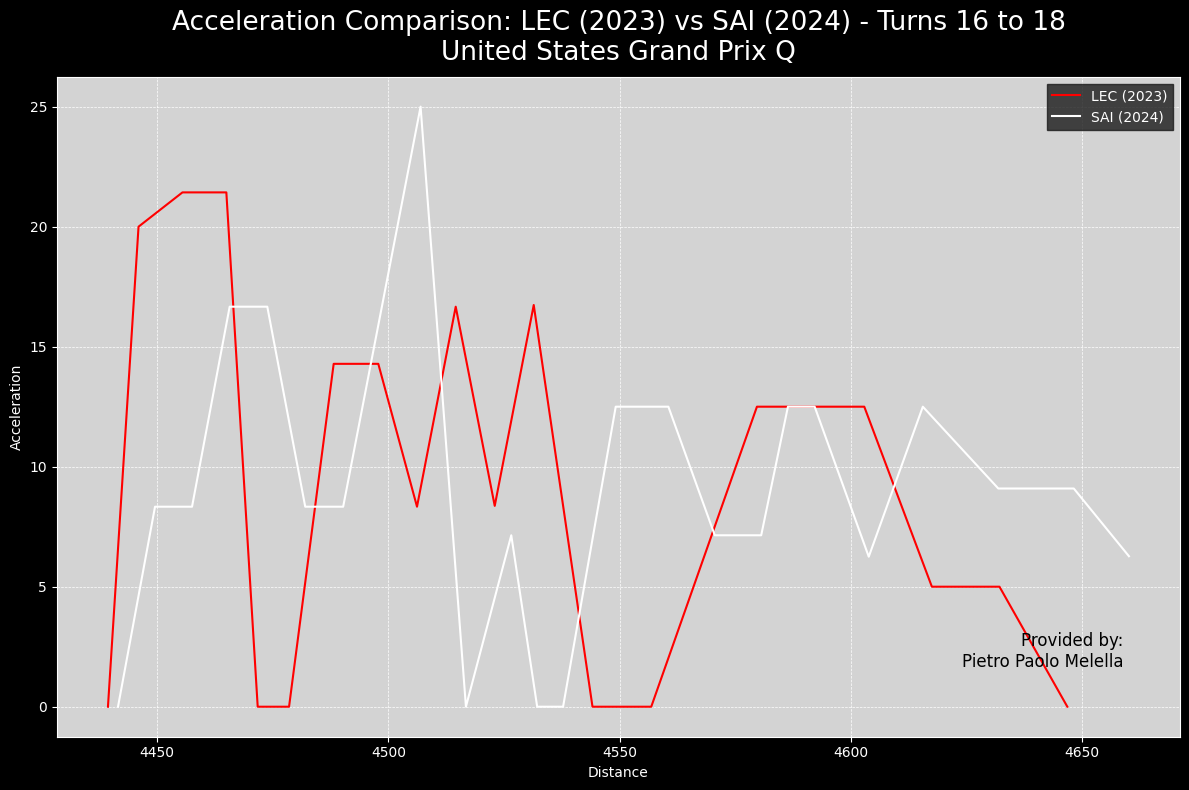

In [21]:
# Define the two drivers and their corresponding datasets
driver_23 = 'LEC'
driver_24 = 'SAI'

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# --- Process LEC (2023) data for turns 16 to 18 ---
# Pick the fastest lap for LEC in 2023
fastest_lap_23 = transformed_laps_23.pick_drivers(driver_23).pick_fastest()

# Get car data and add distance
car_data_23 = fastest_lap_23.get_car_data().add_distance()

# Interpolating
car_data_23 = interpolate_dataframe(car_data_23)

# Selecting the data starting from turn 16 to 18 for LEC (2023)
car_data_turn_16_18_23 = car_data_23[
    (car_data_23['Distance'] > (corner_distances[15] + 35)) & 
    (car_data_23['Distance'] < corner_distances[17])
].copy()

# Calculate acceleration for LEC (2023)
car_data_turn_16_18_23['Acceleration'] = (
    car_data_turn_16_18_23['Speed'].diff().fillna(0) /
    car_data_turn_16_18_23['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for LEC (2023)
car_data_turn_16_18_23_throttle_99 = car_data_turn_16_18_23[car_data_turn_16_18_23['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for LEC (2023)
plt.plot(car_data_turn_16_18_23_throttle_99['Distance'], 
         car_data_turn_16_18_23_throttle_99['Acceleration'], 
         color='red', label=f"{driver_23} (2023)")

# --- Process SAI (2024) data for turns 16 to 18 ---
# Pick the fastest lap for SAI in 2024
fastest_lap_24 = transformed_laps_24.pick_drivers(driver_24).pick_fastest()

# Get car data and add distance
car_data_24 = fastest_lap_24.get_car_data().add_distance()

# Interpolating
car_data_24 = interpolate_dataframe(car_data_24)

# Selecting the data starting from turn 16 to 18 for SAI (2024)
car_data_turn_16_18_24 = car_data_24[
    (car_data_24['Distance'] > (corner_distances[15] + 35)) & 
    (car_data_24['Distance'] < corner_distances[17])
].copy()

# Calculate acceleration for SAI (2024)
car_data_turn_16_18_24['Acceleration'] = (
    car_data_turn_16_18_24['Speed'].diff().fillna(0) /
    car_data_turn_16_18_24['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for SAI (2024)
car_data_turn_16_18_24_throttle_99 = car_data_turn_16_18_24[car_data_turn_16_18_24['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for SAI (2024)
plt.plot(car_data_turn_16_18_24_throttle_99['Distance'], 
         car_data_turn_16_18_24_throttle_99['Acceleration'], 
         color='white', label=f"{driver_24} (2024)")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title(f"Acceleration Comparison: {driver_23} (2023) vs {driver_24} (2024) - Turns 16 to 18\n{session_24.event['EventName']} Q", color='white')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

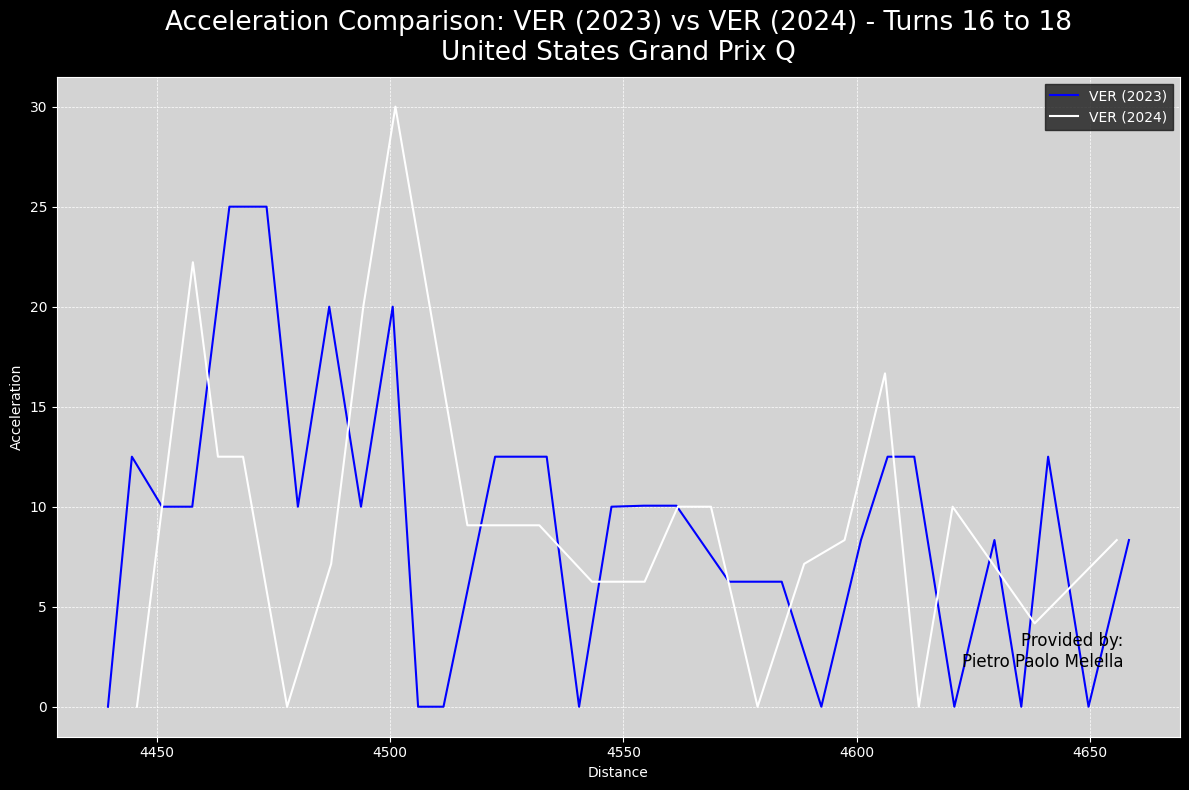

In [22]:
# Define the driver and corresponding datasets for 2023 and 2024
driver = 'VER'

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# --- Process VER (2023) data for turns 16 to 18 ---
# Pick the fastest lap for VER in 2023
fastest_lap_23 = transformed_laps_23.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_23 = fastest_lap_23.get_car_data().add_distance()

# Interpolating 
car_data_23 = interpolate_dataframe(car_data_23)

# Selecting the data starting from turn 16 to 18 for VER (2023)
car_data_turn_16_18_23 = car_data_23[
    (car_data_23['Distance'] > (corner_distances[15] + 35)) & 
    (car_data_23['Distance'] < corner_distances[17])
].copy()

# Calculate acceleration for VER (2023)
car_data_turn_16_18_23['Acceleration'] = (
    car_data_turn_16_18_23['Speed'].diff().fillna(0) /
    car_data_turn_16_18_23['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for VER (2023)
car_data_turn_16_18_23_throttle_99 = car_data_turn_16_18_23[car_data_turn_16_18_23['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for VER (2023)
plt.plot(car_data_turn_16_18_23_throttle_99['Distance'], 
         car_data_turn_16_18_23_throttle_99['Acceleration'], 
         color='blue', label=f"{driver} (2023)")

# --- Process VER (2024) data for turns 16 to 18 ---
# Pick the fastest lap for VER in 2024
fastest_lap_24 = transformed_laps_24.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_24 = fastest_lap_24.get_car_data().add_distance()

# Interpolating 
car_data_24 = interpolate_dataframe(car_data_24)

# Selecting the data starting from turn 16 to 18 for VER (2024)
car_data_turn_16_18_24 = car_data_24[
    (car_data_24['Distance'] > (corner_distances[15] + 35)) & 
    (car_data_24['Distance'] < corner_distances[17])
].copy()

# Calculate acceleration for VER (2024)
car_data_turn_16_18_24['Acceleration'] = (
    car_data_turn_16_18_24['Speed'].diff().fillna(0) /
    car_data_turn_16_18_24['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for VER (2024)
car_data_turn_16_18_24_throttle_99 = car_data_turn_16_18_24[car_data_turn_16_18_24['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for VER (2024)
plt.plot(car_data_turn_16_18_24_throttle_99['Distance'], 
         car_data_turn_16_18_24_throttle_99['Acceleration'], 
         color='white', label=f"{driver} (2024)")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title(f"Acceleration Comparison: {driver} (2023) vs {driver} (2024) - Turns 16 to 18\n{session_24.event['EventName']} Q", color='white')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

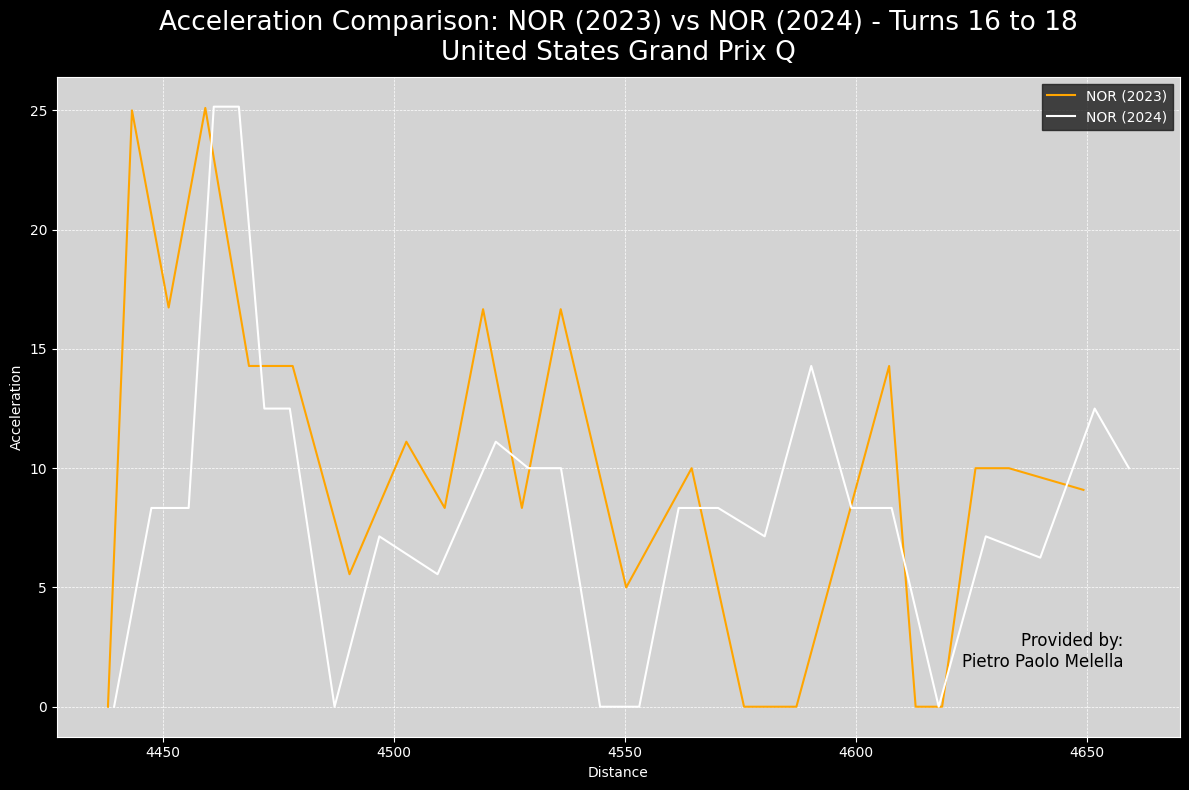

In [23]:
# Define the driver and corresponding datasets for 2023 and 2024
driver = 'NOR'

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# --- Process NOR (2023) data for turns 16 to 18 ---
# Pick the fastest lap for NOR in 2023
fastest_lap_23 = transformed_laps_23.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_23 = fastest_lap_23.get_car_data().add_distance()

# Interpolating 
car_data_23 = interpolate_dataframe(car_data_23)

# Selecting the data starting from turn 16 to 18 for NOR (2023)
car_data_turn_16_18_23 = car_data_23[
    (car_data_23['Distance'] > (corner_distances[15] + 35)) & 
    (car_data_23['Distance'] < corner_distances[17])
].copy()

# Calculate acceleration for NOR (2023)
car_data_turn_16_18_23['Acceleration'] = (
    car_data_turn_16_18_23['Speed'].diff().fillna(0) /
    car_data_turn_16_18_23['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for NOR (2023)
car_data_turn_16_18_23_throttle_99 = car_data_turn_16_18_23[car_data_turn_16_18_23['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for NOR (2023)
plt.plot(car_data_turn_16_18_23_throttle_99['Distance'], 
         car_data_turn_16_18_23_throttle_99['Acceleration'], 
         color='orange', label=f"{driver} (2023)")

# --- Process NOR (2024) data for turns 16 to 18 ---
# Pick the fastest lap for NOR in 2024
fastest_lap_24 = transformed_laps_24.pick_drivers(driver).pick_fastest()

# Get car data and add distance
car_data_24 = fastest_lap_24.get_car_data().add_distance()

# Interpolating 
car_data_24 = interpolate_dataframe(car_data_24)

# Selecting the data starting from turn 16 to 18 for NOR (2024)
car_data_turn_16_18_24 = car_data_24[
    (car_data_24['Distance'] > (corner_distances[15] + 35)) & 
    (car_data_24['Distance'] < corner_distances[17])
].copy()

# Calculate acceleration for NOR (2024)
car_data_turn_16_18_24['Acceleration'] = (
    car_data_turn_16_18_24['Speed'].diff().fillna(0) /
    car_data_turn_16_18_24['SessionTime'].dt.total_seconds().diff().fillna(0)
).fillna(0)

# Filter where throttle is less than 101 for NOR (2024)
car_data_turn_16_18_24_throttle_99 = car_data_turn_16_18_24[car_data_turn_16_18_24['Throttle'] < 101].reset_index()

# Plot acceleration vs. distance for NOR (2024)
plt.plot(car_data_turn_16_18_24_throttle_99['Distance'], 
         car_data_turn_16_18_24_throttle_99['Acceleration'], 
         color='white', label=f"{driver} (2024)")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title(f"Acceleration Comparison: {driver} (2023) vs {driver} (2024) - Turns 16 to 18\n{session_24.event['EventName']} Q", color='white')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()